## *problem statement*

In [12]:
# import random
from random import Random
SEED = 5
# random.seed(SEED)
random_gen = Random(x = SEED)

for _ in range(10):
    print(random_gen.uniform(a=0, b=1))

0.6229016948897019
0.7417869892607294
0.7951935655656966
0.9424502837770503
0.7398985747399307
0.922324996665417
0.029005228283614737
0.46562265437810535
0.9433567169983137
0.6489745531369242


In [13]:
def generate_pts(N = 1000):
    lst_x, lst_y = [], []
    for _ in range(N):
        lst_x.append(random_gen.uniform(a=0, b=1))
        lst_y.append(random_gen.uniform(a=0, b=1))
    return lst_x, lst_y

data_x, data_y = generate_pts()
print(data_x[:10])
print(data_y[:10])

[0.9009004917506227, 0.46906904778216374, 0.5437608592359304, 0.013114189588902203, 0.2794823660111103, 0.7657254516291417, 0.7971469914312045, 0.6174525204661166, 0.0017748622025346439, 0.2094563824951179]
[0.11320596465314436, 0.24657283261983032, 0.5739411879281008, 0.21672980046384815, 0.9163453718085519, 0.15960421235803823, 0.13876741839890316, 0.1266992325502697, 0.8714047447242821, 0.21548116922473226]


In [14]:
def generate_pts_comp(N = 1000):
    return(
        [ random_gen.uniform(a=0, b=1) for _ in range(N) ], 
        [ random_gen.uniform(a=0, b=1) for _ in range(N) ]
    )

data_x, data_y = generate_pts_comp()
print(data_x[:10])
print(data_y[:10])

[0.5816946983819095, 0.5270982387806072, 0.7891607275954671, 0.5762592856807394, 0.6381447540352465, 0.5637421557759738, 0.8229098318797783, 0.09648644792653349, 0.11396160329692895, 0.8657239965914947]
[0.9734124354010594, 0.5962796924575063, 0.9783732651086904, 0.47224847957339167, 0.8681054325750435, 0.8436735901498165, 0.9257289190902358, 0.4595667341559352, 0.5085663349255882, 0.03486505590525857]


In [15]:
def generate_pts(N = 1000):
    lst_x, lst_y = [], []
    for _ in range(N):
        lst_x.append(random_gen.uniform(a=0, b=1))
    for _ in range(N):
        lst_y.append(random_gen.uniform(a=0, b=1))
    return lst_x, lst_y

data_x, data_y = generate_pts()
print(data_x[:10])
print(data_y[:10])

[0.15484109078190134, 0.8398311959407682, 0.10047793927502402, 0.7592170072399632, 0.9905314696261447, 0.7869303548644226, 0.4899165051524964, 0.20394966968968453, 0.8400580028178369, 0.1909897760393755]
[0.6349340679358454, 0.781653421682424, 0.8614756324154917, 0.12793251733994504, 0.19813216825391655, 0.004323305781084419, 0.9835683600724359, 0.4835931713008621, 0.5962405943391967, 0.8692948839439959]


## *visualizing problem*

C:\Users\Mars\AppData\Local\Temp/ipykernel_5088/606033428.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


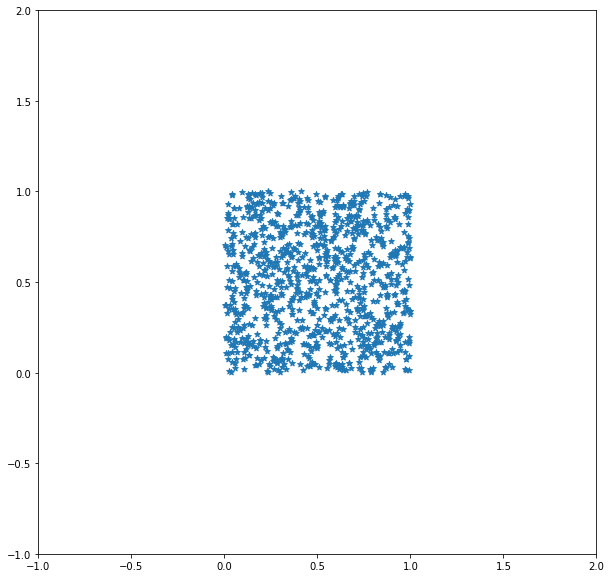

In [18]:
from matplotlib.pyplot import figure

fig = figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x=data_x, y=data_y, marker='*')
ax.set_xlim(left=-1, right=2)
ax.set_ylim(bottom=-1, top=2)
fig.show()

## *evaluate loss*

In [19]:
from math import sqrt

def loss(x_p, y_p):
    return (1 / len(data_x)) * sum(
        [sqrt((x_i - x_p)**2 + (y_i - y_p)**2)
        for x_i, y_i in zip(data_x, data_y)]
    )

## *visualize loss*

In [29]:
STEP = 0.01
MESH_SIZE = 300

x_mesh = [ -1 + i*STEP for i in range(MESH_SIZE) ]
y_mesh = [ -1 + i*STEP for i in range(MESH_SIZE) ]

loss_mesh = [
    [ loss(x_curr, y_curr) for x_curr in x_mesh ]   # row by row
    for y_curr in y_mesh    # append list for each row
]

C:\Users\Mars\AppData\Local\Temp/ipykernel_5088/2843344630.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


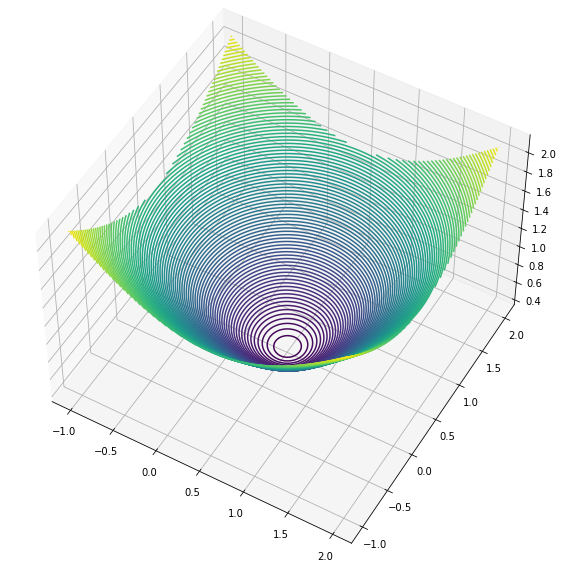

In [45]:
fig = figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.contour(x_mesh, y_mesh, loss_mesh, levels=100)
# ax.stem(x_mesh, y_mesh, loss_mesh)
ax.view_init(elev=50)
fig.show()

## *numerical conceptualization of derivatives*

0.49400091971360194 0.5170758973981693


C:\Users\Mars\AppData\Local\Temp/ipykernel_5088/3920482000.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


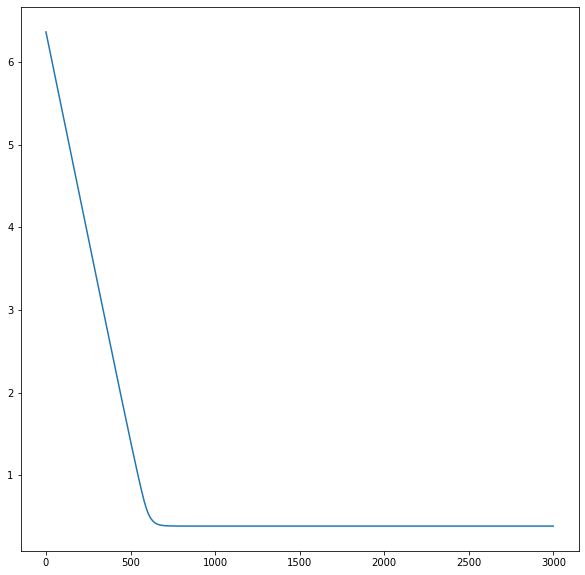

In [47]:
x_p, y_p = 5, 5
EPOCHS = 3000
DELTA = 0.01
H = 0.001

epoch_losses = []
for _ in range(EPOCHS):
    epoch_losses.append(loss(x_p, y_p))
    dloss_dx = (loss(x_p + H, y_p) - loss(x_p, y_p)) / H
    dloss_dy = (loss(x_p, y_p + H) - loss(x_p, y_p)) / H
    x_p -= DELTA * dloss_dx
    y_p -= DELTA * dloss_dy

print(x_p, y_p)

fig = figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(epoch_losses)
fig.show()

---

In [ ]:
type(range(10))

range

In [ ]:
dict = { K:0 for K in range(10) }
dict

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [ ]:
lst = []
for i in range(10):
    for j in range(10):
        lst.append(i*j)
print(lst)
print()

lst = [ i*j for i in range(10) for j in range(10) ]
print(lst)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 0, 9, 18, 27, 36, 45, 54, 63, 72, 81]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 0, 9, 18, 27, 36, 45, 54, 63, 72, 81]
